# CS490 Report

| Classifiers                | Score on Training | Score on Validation | Score on Leaderboard |
|----------------------------|-------------------|---------------------|----------------------|
| KNN (20)                   | 94.8%             | 89.8%               | 62.8%                |
| SVM (sigmoid)              | 82.04%            | 84.6%               | 82.6%                |
| Neural Network(15 neurons) | 72.4%             | 91.8%               | 81.2%                |

### Starter Code used for each model

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from imblearn.over_sampling import SMOTE  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
xTestData = np.genfromtxt("data/X_test.txt", delimiter = None, skip_header=1)
xTrainData = np.genfromtxt("data/X_train.txt", delimiter = None, skip_header=1)
yTrainData = np.genfromtxt("data/Y_train.txt", delimiter = None, skip_header=1)

In [7]:
xTrain, xVal, yTrain, yVal = train_test_split(xTrainData, yTrainData, test_size=0.25, shuffle = True)

In [8]:
yTrainDist = yTrain[:, 1]
yValDist = yVal[:,1]

#OverSampler
sm = SMOTE(random_state = 2)

# Support Vector Classifier

Each of the models that we trained were tested on multiple sets of features. For this model, we did reserach to find if we can use some code to figure out what the important features are for this dataset. We found that we can use the ExtraTrees classifier to see the important features. We trained that classifer with all of the features from the training data text file. This gave the results that size, current ratio, quick ratio, total margin, return on equity, net working capital, return on assets, long-term debt to equity, equity financing ratio, and debt ratio are the 10 most important. This can be seen in the graph below.

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


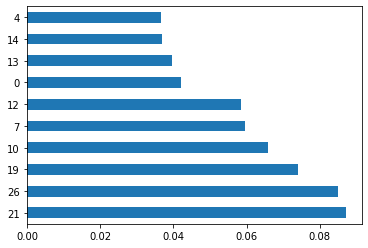

In [3]:
import numpy as np # linear algebra
from sklearn.preprocessing import StandardScaler
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
xTrainData = np.genfromtxt("data/X_train.txt", delimiter = None, skip_header=1)
yTrainData = np.genfromtxt("data/Y_train.txt", delimiter = None, skip_header=1)
X = xTrainData[:,1:35]  #independent columns
y = yTrainData[:,1]    #target column i.e price range

scale = StandardScaler().fit(X)
xTrainScaled = scale.transform(X)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(xTrainScaled,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The training data from the text file was split into 75% training data and 25% validation data. The training data was then balanced using over sampling. The training and test data were also scaled. The SVC model was trained on the 75% split. The SVC also had different options for the kernel function. Sci-kit learn gave the options to have a linear, poly, rbf and sigmoid. The one that worked the best for us was the sigmoid kernel function. To figure out which kernel function worked the best we looked at the confusion matrix and the score.

## Neural Network

The neural network was the most challenging for Chris and I since at first we thought having a lot of hidden layers and lot of neurons at each layer was how these models should be trained. We later realized that more hidden layers and neurons was on the track more towards deep learning. For this, we will talk about out best neural network performer.

Our best performer was trained on one feature, the total margin. The training data was also balanced using overfitting. We did plenty of runs with all off ther different activation functions, max iterations, and the step sizes for gradient descent. We kept the default value for gradient descent since the others seemed to overfit or underfit our data each time.  We kept a max iteration of 2000, since we were getting warnings about our models not converging with a lower value.  The activation function options were identity, logistic, tanh, and relu. Logistic worked the best four the total margin feature. We chose to use one hidden layer with 15 neurons. Our scoring function ran scores for one hidden layer and tried 1-25 neurons. After multiple runs, 15 neurons seemed to appear the most with the best score and best looking confusion matrix. A higher step size for gradient descent also performed best for this model. We chose a step size of 10. Anything more or anything less for this amount of hidden layers did not perform well.

## Best Performer

Our best performer was the Support Vector classifier with the sigmoid kernel function. For our best prediction we used 10 features from the data. A Support vector Machine worked well for this since they tend to be effective for high dimensional spaces. With sci-kit learn the prediction probability function also ran the training through cross-validation making the model more accurate and precise. For Support Vector Machines, it maximizes the margin between the two classes, in this case its whether the hospital is in financial distress or not. On top of that, we trained the data with a sigmoid kernel function which would help the model train more effectively by adding curves to the decision boundries. The margins between the support vectors were not just linear. We could not graph 10 features together, but the data most likely was shaped in a way where finding the maximal margin for the decision boundry separated the data enough to make accurate predictions.

### Code

In [9]:
xTrainImp = xTrain[:,[1,4,5,11,13,8,14,22,20,27]]
xValImp = xVal[:,[1,4,5,11,13,8,14,22,20,27]]
xTestImp = xTestData[:,[1,4,5,11,13,8,14,22,20,27]]
xTrainBal, yTrainBal = sm.fit_sample(xTrainImp, yTrainDist.ravel())

scale = StandardScaler().fit(xTrainBal)
xTrainScaled = scale.transform(xTrainBal)
xTestScaled = scale.transform(xTestImp)

svc = svm.SVC(kernel="sigmoid", probability=True)
svc.fit(xTrainScaled, yTrainBal)
probs = svc.predict_proba(xTestScaled)

## Good and Bad Performers

In terms of good performers neural networks with one or two hidden layers with a logistic activation function and between 10-15 neurons at each layer performed particularly well. We did two submissions using those parameters. We trained the models with total margin as the only feature, which was balanced using overfitting. Both of these scores were 81% on the leaderboard. For this data, moving in the direction of deep learning is ineffective. More hidden layers caused overfitting since the data was not complex enough.

The performer that was not so great was K-Nearest neighbors. We tried plenty of different feature combinations and various amounts of nearest neighbors. The best leaderboard score was 62%. The shape of the data is not separable enough for the nearest neighbors to train effectively on. The data could be too scattered for the feature combinations we were training on.

There are a few more honorable mentions when looking at the the performance of all of the models. Our highest scores on the leaderboard had the same trend when it came to the values of the confusion matrix. When the score function returned a score of around 90% on the validation set, and the confusion matrix favored false negatives, we tended to score 75% or higher on the leaderboard. On top of that, for these same results, the f-1 score for not in distress was around 91 percent and the f-1 score for in distress was around 40%. The models that returned less false negatives did poorly on the test data. Trying to maximaize the f-1 scores also showed poor results on the test data. In all, favoring false negatives seemed to play a key role in performance on the test data. Having a higher number of false negatives proved to be a good way of balancing underfitting and overfitting the training data.